## Link Predicition Algorithm approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

## Link_preidction.csv contians the scores of link prediction algorthim

TN - Total Nieghbours

AA - Adamic adar

CN - Common Neigbour

PA- Preferential Attachment

LA - Link allocation

In [2]:
df=pd.read_csv("link_prediction.csv", delimiter = ";")
df.head()

,TN,AA,CN,RA,PA,label
0,2.0,0.434294,1.0,0.1,2.0,1.0
1,3.0,0.000000,0.0,0.0,2.0,1.0
2,3.0,0.000000,0.0,0.0,2.0,1.0
3,4.0,0.000000,0.0,0.0,3.0,1.0
4,3.0,0.000000,0.0,0.0,2.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TN      280 non-null    float64
 1   AA      280 non-null    float64
 2   CN      280 non-null    float64
 3   RA      280 non-null    float64
 4   PA      280 non-null    float64
 5   label   280 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [5]:
df.describe()

,TN,AA,CN,RA,PA,label
count,280.00000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,8.80000,0.072899,0.185714,0.018571,16.157143,0.571429
std,9.95344,0.203255,0.549822,0.054982,28.349779,0.495758
min,2.00000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,4.00000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,5.00000,0.000000,0.000000,0.000000,6.000000,1.000000
75%,9.00000,0.000000,0.000000,0.000000,14.000000,1.000000
max,36.00000,0.868589,5.000000,0.500000,264.000000,1.000000


In [6]:
df[['CN','PA','RA', 'TN']] = df[['CN','PA','RA', 'TN']].replace(0,np.NaN) #replace 0 value with nan

In [7]:
df.isnull().sum()

TN         0
AA         0
CN       243
RA       243
PA         0
label      0
dtype: int64

## Missing Data Imputation

In [8]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000)

In [9]:
# start the KNN training
imputed_training=fast_knn(df[['CN','PA','RA', 'TN']].values, k=30)

In [10]:
df_t1 = pd.DataFrame(imputed_training,columns=['CN','PA','RA', 'TN'])

df[['CN','PA','RA', 'TN']] = df_t1[['CN','PA','RA', 'TN']]

In [11]:
df.isnull().sum()

TN       0
AA       0
CN       0
RA       0
PA       0
label    0
dtype: int64

## Create features, labels and training , test set

In [12]:
# Create features and labels 
features = df.drop(['label'], axis=1)
labels = df['label']
# Create training and test set 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 15)

## Feature Scaling

In [13]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.fit_transform(features_test)

In [14]:
a=x_sc.fit_transform(features)
df_feat = pd.DataFrame(a, columns = df.columns[:-1])

In [15]:
# appending the outcome feature
df_feat['label'] = df['label'].astype(int)

In [16]:
df = df_feat.copy()
df_feat.head()

,TN,AA,CN,RA,PA,label
0,-0.684404,1.781223,-1.476414,-1.476414,-0.500268,1
1,-0.583756,-0.359302,-0.008021,-0.008021,-0.500268,1
2,-0.583756,-0.359302,-0.008021,-0.008021,-0.500268,1
3,-0.483109,-0.359302,-0.008021,-0.008021,-0.464931,1
4,-0.583756,-0.359302,-0.008021,-0.008021,-0.500268,1


## KNN Algorithm

In [17]:
def knn(k):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(features_train, labels_train)
    pred = classifier.predict(features_test) 
    
    return pred
knn(5)

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1.])

## Evaluation Metrices

In [18]:
def calculation(k):
    pred = knn(k)
    print(pred)
    accuracy = round(accuracy_score(labels_test, pred),3)
    precision = round(precision_score(labels_test, pred), 3)
    recall = round(recall_score(labels_test, pred), 3)
    auroc = round(roc_auc_score(labels_test, pred), 3)
    F1 = round(f1_score(labels_test, pred), 3)
    
    return [k, accuracy, precision, recall, auroc, F1]
    
calculation(3) 

[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]


[3, 0.729, 0.718, 0.778, 0.727, 0.747]

In [19]:
matrix = []
for k in [3,5,7,9,12]:
    matrix.append(calculation(k))
#print(matrix)
matrices = pd.DataFrame(matrix, columns= ["k","Accuracy", "Precision", "Recall", "Auroc", "F1"])

[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1

In [20]:
matrices

,k,Accuracy,Precision,Recall,Auroc,F1
0,3,0.729,0.718,0.778,0.727,0.747
1,5,0.657,0.676,0.639,0.658,0.657
2,7,0.743,0.750,0.750,0.743,0.750
3,9,0.686,0.719,0.639,0.687,0.676
4,12,0.643,0.690,0.556,0.645,0.615


## ROC CURVE

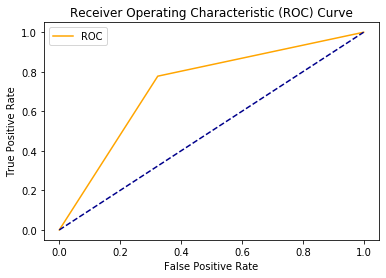

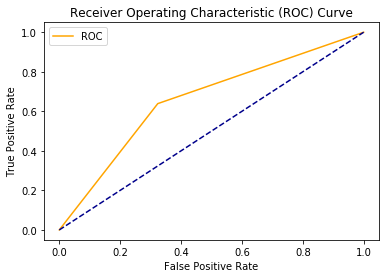

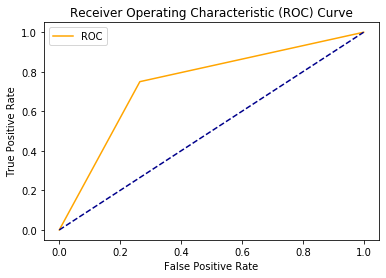

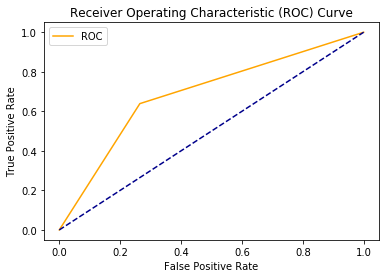

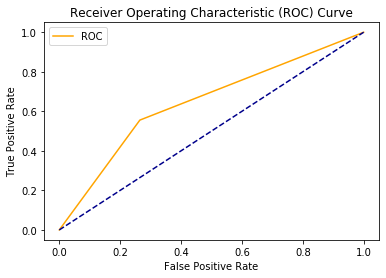

In [21]:
a =[3,5,7,9,12]
for i in a:

    knn = KNeighborsClassifier(i)
    knn.fit(features_train,labels_train)
    pred = knn.predict(features_test)
    fpr, tpr, thresholds = roc_curve(labels_test, pred)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

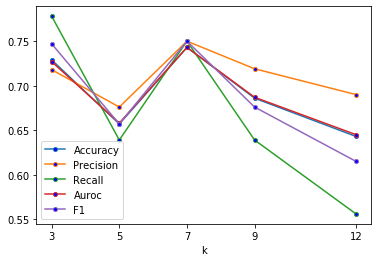

In [22]:
matrices.plot.line(x= "k", y= None, xticks=[3,5,7,9,12],marker='o',
         markerfacecolor='blue', markersize=4)

## Permutation Importance


TN : 0.0704761904761905
AA : 0.001904761904761898
CN : 0.013333333333333308
RA : 0.018095238095238074
PA : 0.25142857142857145


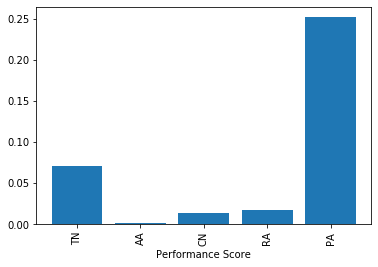

In [26]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, features_train, labels_train, scoring = "accuracy", random_state =15)
importance = results.importances_mean
print()
for i in range(len(importance)):
    print(features_train.columns[i],":", importance[i])
    
plt.bar(features_train.columns, importance)
plt.xticks(rotation=90)
plt.xlabel("Performance Score")
plt.show()